## <center>CITS5508 Lab sheet 4: Ensemble Classifiers</center>

**Name: Samuel Heath**<br>
**Student number: 21725083**<br>

## Project 1 - Ensemble on Parkinsons Data
### Summary:
- Load and clean data.
- Remove Classes that dont have enough instances.
- Remove unneeded features and scale the dataset.
- Train Voting Classifier Ensemble with Logistic Regression and SVM classifiers.

##### Load Data from `./parkinsons.data`

In [18]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from six.moves import urllib

# Set the random seed to ensusre consistent results
random_seed = 12

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
# Download CSV, status 1 = Parkinsons,  0 = unhealthy
with urllib.request.urlopen(data_url) as response:
    data = response.read().decode('utf8')
    out = open('./parkinsons.data', 'w')
    out.write(data)
    out.close()

park_data = pd.read_csv('./parkinsons.data')

park_data = park_data.drop('name', axis=1)  
print(park_data.head())
park_data.describe()

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


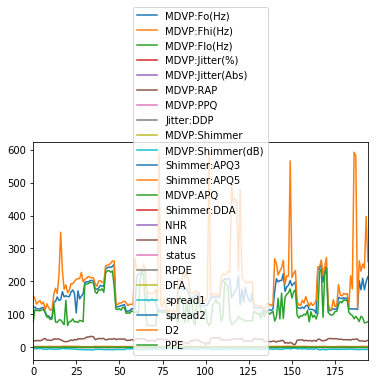

In [19]:
park_data.plot()
plt.show()

From the Plot we see there are a few variables which are highly weighted due to the difference in the variables scales.

In [20]:
park_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


We should remove some of these columns which are not particularly useful to us.

In [21]:
# Drop rows where these columns are used
park_data = ecoli_data.drop(park_data_data[park_data.label.isin([""])].index)
park_data.reset_index()

park_data_copy = park_data.copy()

# Check that it was removed
parK_data.head()

NameError: name 'ecoli_data' is not defined

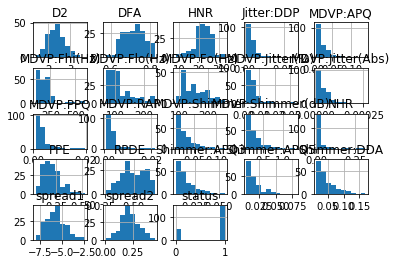

In [22]:
park_data.hist()
plt.show()



## Split the dataset into training and testing datasets


In [82]:
from sklearn.model_selection import StratifiedShuffleSplit

# Shuffle then split the dataset into 80/20 (training/testing) sets
sss = StratifiedShuffleSplit(random_state=random_seed, test_size=0.2, train_size=0.8)

# Have not separated the labels before performing the split as it was just easier initially.

# Perform the split and assign the X_train and X_test sets, then
for train_index, test_index in sss.split(park_data, park_data.status):
    X_train, X_test = park_data.iloc[train_index], park_data.iloc[test_index]    
    
# Get the labels of the dataset
y_train, y_test = X_train.status, X_test.status

# Drop Labels from X
X_train = X_train.drop("status", axis=1)
X_test = X_test.drop("status", axis=1)

Scale the training and testing data sets so that SVM can better fit the data, and so we can compare the scaled and unscaled models.

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fit the data to a Model
Make 3 models. Ensemble Voting Classifier, Logisitc Regression, and Suppot Vector Machine Classifier

In [84]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression Classifier
lr = LogisticRegression(C=2, solver='liblinear', random_state=random_seed)

# Create Support Vector Classifier
svm = SVC(gamma="auto", C=3, kernel="linear", random_state=random_seed)

ensemble_clf = VotingClassifier(estimators=[("Logistic", lr), ("SVM", svm)]).fit(X_train_scaled, y_train)
ensemble_test_predict = ensemble_clf.predict(X_test_scaled)

lr_test_predict = lr.fit(X_train_scaled, y_train).predict(X_test_scaled)
svm_test_predict = svm.fit(X_train_scaled, y_train).predict(X_test_scaled)

For the Logistic Regression Classifier .

For the SVM Classifier

### Accuracy of Fitted Models
Compare the accuracy of the fitted models using their f1 score and confusion matrices.

In [85]:
ensemble_f1 = f1_score(y_test, ensemble_test_predict)
lr_f1 = f1_score(y_test, lr_test_predict)
svm_f1 = f1_score(y_test, svm_test_predict)

print("Ensemble: %.6f%%\tLogistic: %.6f%%\tSVM: %.6f%%" % (ensemble_f1, lr_f1, svm_f1))

Ensemble: 0.918033%	Logistic: 0.918033%	SVM: 0.935484%


Based on the f1 scores we see that all the classifiers are quite accurate.

Lets see the confusion matricies to observer where the classifiers are failing to properly identify PD and Healthy Patients.

In [86]:
def plot_confusion_matrix(matrix, title=""):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.title(title)
    
    locs, labels = plt.xticks()
    # Because labels are not applied at the 0 location we need an extra label to ensure its displayed
    labels = ["", "Healthy", "Parkinsons"]
    plt.xticks(locs, labels)
    y_loc, y_label = plt.yticks()
    plt.yticks(y_loc, labels)
    
    for i in range(2):
        for j in range(2):
            c = matrix[j,i]
            ax.text(i, j, str(c), va='center', ha='center', color='red')
    
    cax = ax.matshow(matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax)

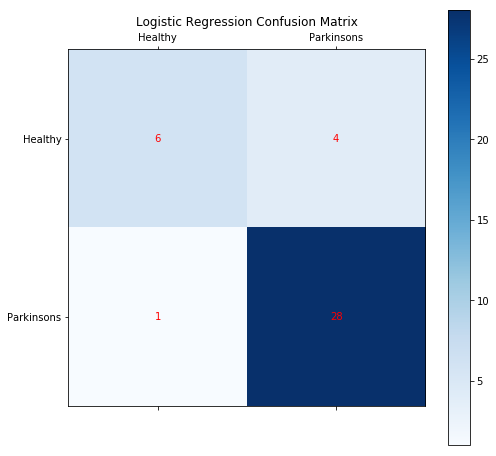

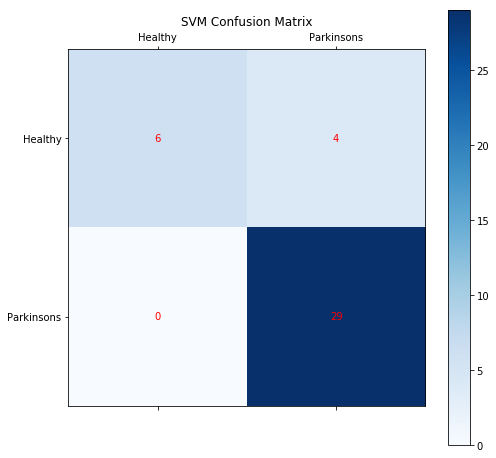

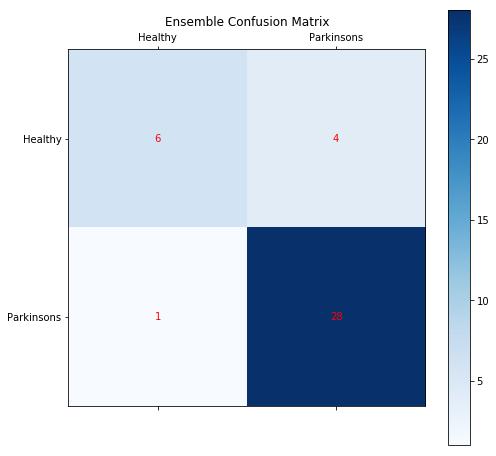

In [87]:
plot_confusion_matrix(confusion_matrix(y_test, lr_test_predict), "Logistic Regression Confusion Matrix")
plot_confusion_matrix(confusion_matrix(y_test, svm_test_predict), "SVM Confusion Matrix")
plot_confusion_matrix(confusion_matrix(y_test, ensemble_test_predict), "Ensemble Confusion Matrix")

Comments on Confusion Matrix

## Comparison of Ensemble to Base Classifiers


# Project 2 - Abalone Regression
### Summary:
- Download Abalone dataset
- Remove columns
- Divide 90/10
- Train Random Forest
- Perform PCA
- RMSE of Re-Trained Random Forest
- Comparison

### Load and Clean the Data
##### Download the data
##### Load Data from `./abalone.data`

In [107]:
abalone_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

with urllib.request.urlopen(abalone_url) as response:
    data = response.read().decode('utf8')
    out = open('./abalone.data', 'w')
    out.write(data)
    out.close()

abalone_data = pd.read_csv('./abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings'])

Need to convert the text field for sex into a numerical field so use a Label Encoder to achieve this

In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
abalone_data.Sex = le.fit_transform(abalone_data.Sex)
abalone_data.describe()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


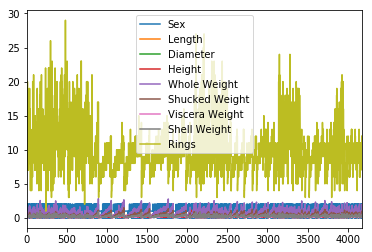

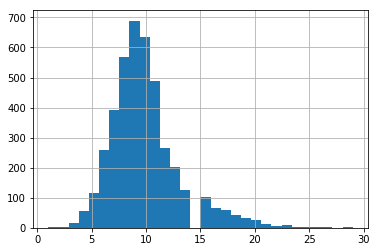

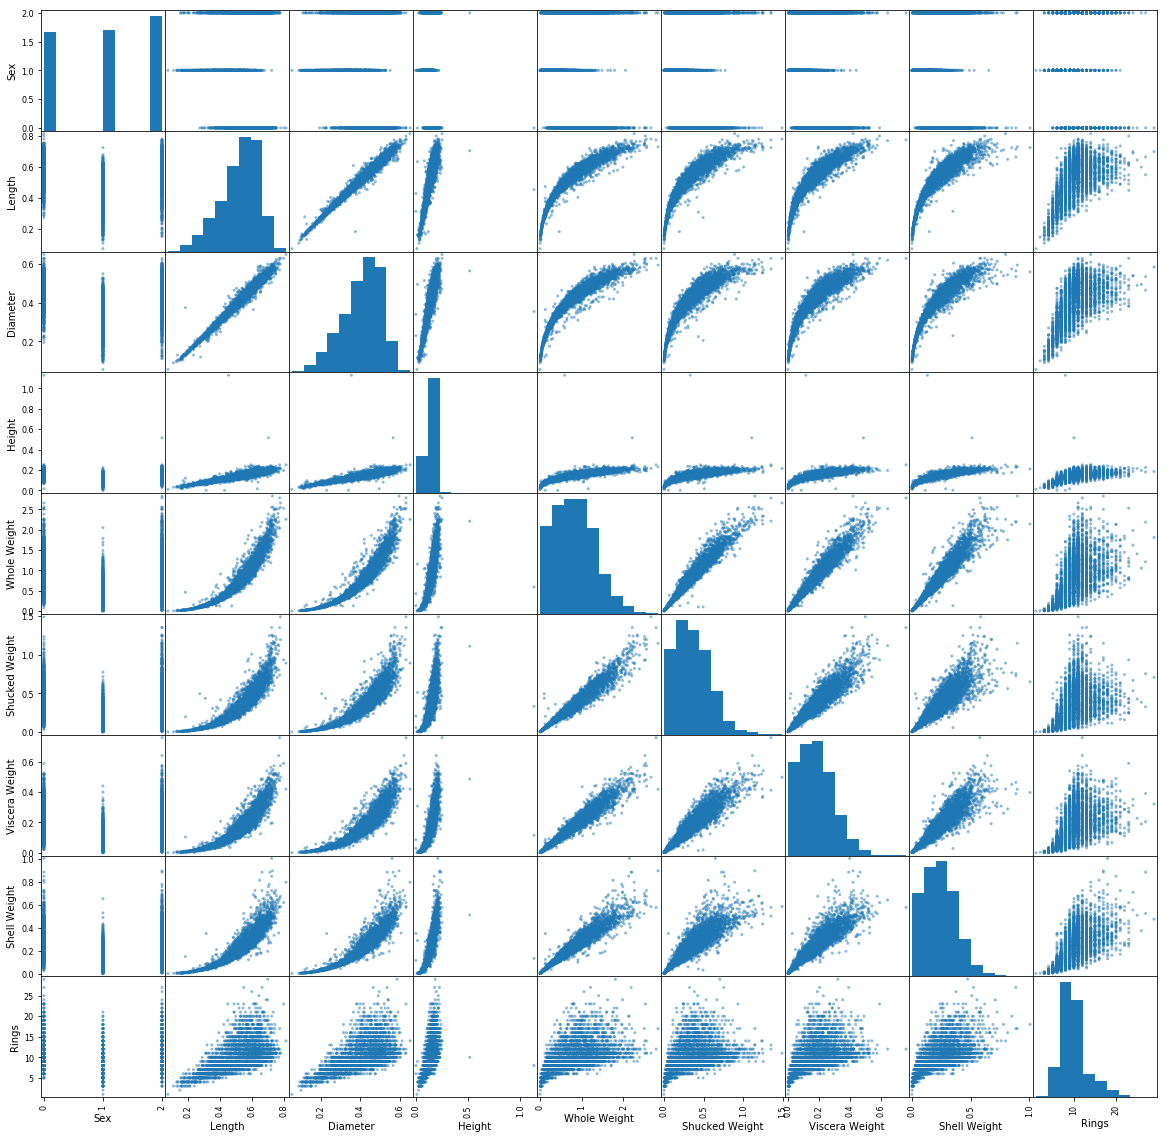

In [109]:
abalone_data.plot()
plt.show()

abalone_data.Rings.hist(bins=30)
plt.show()

from pandas.plotting import scatter_matrix
scatter_matrix(abalone_data, figsize=(20,20))
plt.show()

We see from the distribution that there are very few of the lower classes in the distribution (1,2,3,4) and from (21 to 29) we should probably remove these from the dataset to improve accuracy of prediction.

In [110]:
def group_abalone_rings(data):
    new_ring_groups = []
    for i, row in data.iterrows():
        if row["Rings"] < 4:
            row["Rings"] = 4
        elif row["Rings"] > 22:
            row["Rings"] = 23
        new_ring_groups.append(row["Rings"])
    return new_ring_groups
    
            
abalone_data.Rings = group_abalone_rings(abalone_data)

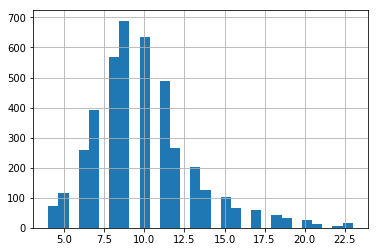

In [111]:
abalone_data.Rings.hist(bins=30)
plt.show()

### Create Training and Test Datasets
Split the data in a 90/10 split for training and testing using a ShuffleSplit as it allows us to split on a given test size quite easily.

In [112]:
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(train_size=0.9, test_size=0.1, random_state=random_seed)

target = "Rings"

for train_index, test_index in ss.split(abalone_data.iloc[:, :len(abalone_data.columns)-2], abalone_data[target]):
    X_train2, X_test2 = abalone_data.iloc[train_index], abalone_data.iloc[test_index]
    y_train2, y_test2 = abalone_data.iloc[train_index][target], abalone_data.iloc[test_index][target]
    
X_train2 = X_train2.drop("Rings", axis=1)
X_test2 = X_test2.drop("Rings", axis=1)

### Fit RandomForestRegressor
We will see which features are most important, remove them and re-train the RFR later on.

In [148]:
from sklearn.ensemble import RandomForestRegressor

# RFR on a scaled feature set
rfr = RandomForestRegressor(criterion="mae", n_estimators=100, min_samples_leaf=10, random_state=random_seed).fit(X_train2, y_train2)

# Predict on the training set
rfr_train_predict = rfr.predict(X_train2)
# Predict on the testing set
rfr_test_predict = rfr.predict(X_test2)

For the RandomForest Regressor hyperparameters were determined by trial and error

Lets view the feature importance of the RandomForestRegressor

In [149]:
print("Feature Importances:")
feature_names = list(X_train2)

feature_name_importance = [(feature_names[i], rfr.feature_importances_[i]) for i in range(len(feature_names))]
feature_name_importance.sort(key= lambda x: x[1], reverse=True)

unimportant_features = []
feature_value = 0
for f in feature_name_importance:
    if feature_value < 0.95:
        feature_value += f[1]
    else:
        unimportant_features.append(f[0])
    print("%s:\t%.6f" % (f[0], f[1]))

print("\nList of Unimportant Features Based on 95% threshold:")
for feat in unimportant_features:
    print(feat)

Feature Importances:
Shell Weight:	0.649304
Shucked Weight:	0.136651
Diameter:	0.062254
Whole Weight:	0.041061
Height:	0.034490
Viscera Weight:	0.029782
Sex:	0.028032
Length:	0.018426

List of Unimportant Features Based on 95% threshold:
Sex
Length


From this feature importance we should remove the least important features to help improve regressor accuracy. We will apply a threshold of 95% feature importance to determine the features to remove are height and length.

In [150]:
X_train2_import = X_train2.copy()
X_train2_import = X_train2_import.drop(unimportant_features, axis=1)

X_test2_import = X_test2.copy()
X_test2_import = X_test2_import.drop(unimportant_features, axis=1)

X_train2_import.describe()

,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
count,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000
mean,0.407228,0.139403,0.826521,0.358513,0.180248,0.238009
std,0.099662,0.042367,0.491410,0.222676,0.109990,0.138782
min,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.345000,0.115000,0.438000,0.184250,0.092000,0.127500
50%,0.425000,0.140000,0.798000,0.335000,0.170000,0.231500
75%,0.480000,0.165000,1.154250,0.501500,0.254000,0.330000
max,0.650000,1.130000,2.779500,1.488000,0.760000,0.885000


In [151]:
rfr_import = RandomForestRegressor(criterion="mae", n_estimators=100, min_samples_leaf=10, random_state=random_seed).fit(X_train2_import, y_train2)


# Predict on the training set
rfr_import_train_predict = rfr_import.predict(X_train2_import)
# Predict on the testing set
rfr_import_test_predict = rfr_import.predict(X_test2_import)

Lets compare the absolute RMSE of both Regressors.

In [152]:
from sklearn.metrics import mean_squared_error

# RandomForestRegressor MSE
rfr_mse_train = mean_squared_error(y_train2, rfr_train_predict)
rfr_mse_test = mean_squared_error(y_test2, rfr_test_predict)

# Format output of errors
print("RMSE of Random Forest Regressor:\nTraining: %.6f\tTest: %.6f\n" % (rfr_mse_train, rfr_mse_test))

# RFR with Feature Importance mse 
rfr_import_mse_train = mean_squared_error(y_train2, rfr_import_train_predict)
rfr_import_mse_test = mean_squared_error(y_test2, rfr_import_test_predict)

# Format output of errors
print("RMSE of Feature Importance Reduced Random Forest Regressor:\nTraining: %.6f\tTest: %.6f\n" % (rfr_import_mse_train, rfr_import_mse_test))

RMSE of Random Forest Regressor:
Training: 4.438505	Test: 4.888807

RMSE of Feature Importance Reduced Random Forest Regressor:
Training: 4.404023	Test: 4.810448



As expected we see that when the dimensionality of the features is reduced to only include the most important features the accuracy of the regressor increases. Lets apply PCA to retain 99% of the variance and remove the unneeded features and then retrain and compare the results of all 3 models.

In [180]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.995, copy=True, random_state=random_seed)

X_train2_pca_red = pca.fit_transform(X_train2)
X_test2_pca_red = pca.transform(X_test2)

print(pca.explained_variance_ratio_)
pca.components_

[0.65982433 0.33149824 0.00384354]


array([[-0.99960494,  0.00839144,  0.00709359,  0.00301219,  0.02274765,
         0.00514613,  0.00688166,  0.00829834],
       [ 0.02715859,  0.19324814,  0.15971987,  0.05938813,  0.8421137 ,
         0.37258704,  0.18245831,  0.22718397],
       [-0.00683019, -0.3816653 , -0.34483191, -0.13991288, -0.00424393,
         0.68587885, -0.0117783 , -0.49519062]])

In [181]:
rfr_pca_red = RandomForestRegressor(criterion="mae", n_estimators=100, oob_score=True, min_samples_leaf=10, random_state=random_seed).fit(X_train2_pca_red, y_train2)

y_pca_train2_predict = rfr_pca_red.predict(X_train2_pca_red)
y_pca_test2_predict = rfr_pca_red.predict(X_test2_pca_red)

In [182]:
# RandomForestRegressor with PCA variance reduction
rfr_red_mse_train = mean_squared_error(y_train2, y_pca_train2_predict)
rfr_red_mse_test = mean_squared_error(y_test2, y_pca_test2_predict)

# Format output of errors
print("RMSE of Variance Reduced Random Forest Regressor:\nTraining: %.6f\tTest: %.6f\n" % (rfr_red_mse_train, rfr_red_mse_test))

RMSE of Variance Reduced Random Forest Regressor:
Training: 4.250169	Test: 4.683070





### Comparison
